## Exploring Weather Trends ##

#### Summary

In this project, it will be analyzed the weather trends in order to check the similarities and changes in the weather between the city of Campinas (Brazil) and the average weather in the world on the period from 1832 and 2013. The two dataframes used in this study were retrieved from Udacity's database and exported as CSV files for analysis in this notebook.

#### Tools

To analyze weather trends it will be used the following tools: pandas to data analyzes, matplotlib to plot the charts, sql to retrieve data from the database. 

#### Sql comands
The following commands were used to get the data from the database:

*   select from global_data;
*   select from city_data where city = 'Campinas';



### Import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
print('imports completed')

imports completed


#### Load dataframes


In [0]:
city_data_url = 'https://raw.githubusercontent.com/marcussimoni/dand-p1-whether-trends/master/city_data.csv'
global_data_url = 'https://raw.githubusercontent.com/marcussimoni/dand-p1-whether-trends/master/global_data.csv'

city_data = pd.read_csv(city_data_url, sep=',')
global_data = pd.read_csv(global_data_url, sep=',')

print('global dataframe and city dataframe created')

global dataset and city dataset created


#### Preparing data to analyze


A quick check shows some null values in the city_data dataframe and we will need to correct them before we start the study. Altogether the dataframe have 182 values in columns year, city and country but only 175 in column avg_temp. We'll fill the null values with the mean of avg_temp columns of the city_data dataframe. After the update, the total from avg_temp column will match with the other columns of the dataframe.

In [0]:
city_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
year        182 non-null int64
city        182 non-null object
country     182 non-null object
avg_temp    175 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ KB


In [0]:
city_data[city_data.isnull().any(axis=1)]

,year,city,country,avg_temp
12,1844,Campinas,Brazil,NaN
13,1845,Campinas,Brazil,NaN
14,1846,Campinas,Brazil,NaN
15,1847,Campinas,Brazil,NaN
16,1848,Campinas,Brazil,NaN
17,1849,Campinas,Brazil,NaN
18,1850,Campinas,Brazil,NaN


In [0]:
city_data['avg_temp'].fillna(city_data['avg_temp'].mean(), inplace=True)

city_data dataframe after replace null values

In [0]:
city_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
year        182 non-null int64
city        182 non-null object
country     182 non-null object
avg_temp    182 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ KB


We check the global_data too to confirm the existence of inconsistencies. Apparently, all values are correct.

In [0]:
global_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


The number of lines in the two dataframes was different: the global_data dataframe has 266 rows and the city_data dataframe has 182 rows. It was necessary to equalize the total of rows in the two dataframes before display the line chart. To do that was necessary to use the same range of years on the two dataframes: between 1832 and 2013. That is the year range present on the city_data dataframe.

In [0]:
city_data.describe()

,year,avg_temp
count,182.000000,182.000000
mean,1922.500000,19.700057
std,52.683014,0.582299
min,1832.000000,18.280000
25%,1877.250000,19.252500
50%,1922.500000,19.700057
75%,1967.750000,20.077500
max,2013.000000,21.300000


In [0]:
global_data.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [0]:
#filtering rows to match with city_data dataframe
global_data = global_data.query('year >= 1832 and year <= 2013')

The next step after preparing the data in the two dataframes is to calculate the moving average for the avg_temp column and to plot a line chart comparing the two calculated values. The moving averange will be calculated using the rolling method from pandas with the parameter window set to 10. The line chart will be plotted using matplotlib.

In [0]:
#select year from city_data dataframe
years = city_data['year'];

moving_average = 10

#calculating moving average with pandas
city_weather = city_data['avg_temp'].rolling(window = moving_average).mean();
global_weather = global_data['avg_temp'].rolling(window = moving_average).mean();

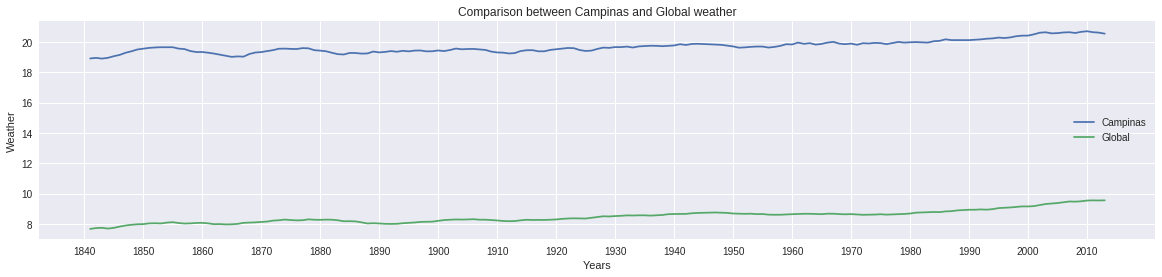

In [0]:
#plot the data

figure(figsize=(20,4))
plt.plot(years, city_weather, label='Campinas');

plt.plot(years, global_weather, label='Global');

plt.xlabel('Years');
plt.ylabel('Weather');
plt.xticks(city_data.query('year % 10 == 0')['year'])
plt.title('Comparison between Campinas and Global weather');
plt.legend();
plt.show();

In [0]:
#mean weather from 1832 until 2013
print('Weather mean in Campinas %.2f°' % city_data['avg_temp'].mean())
print('Weather mean in World %.2f°' % global_data['avg_temp'].mean())

Weather mean in Campinas 19.70°
Weather mean in World 8.49°


We can make some observations from the chart:

* Campinas weather is hotter than the average of the world. the mean is around 19,70° in Campinas and 8,49° in the rest of the world.

* In the early years, it seems the weather to be cooler than newer days as we can see comparing the years 1840 until 2010 in the chart. The temperature seems to be increasing, not only in the city chosen for this study but in the whole world.

* The minimum temperature for Campinas is 18.28° and 5.78° to the world. The maximum is 21.3° and 9.83° respectively.